## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [39]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [40]:
X.shape

(50,)

In [41]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

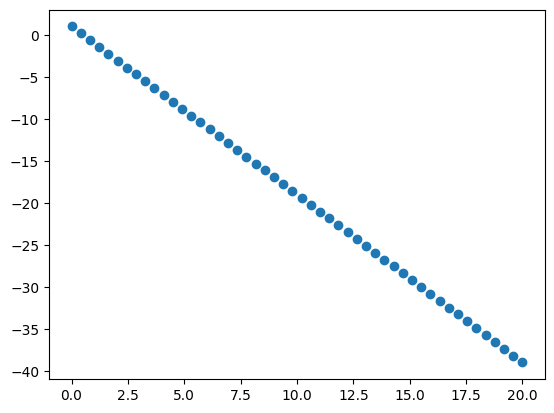

In [42]:
plt.scatter(X,y)
plt.show()

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [43]:
def GD(data,target,learning_rate,max_iterations):
    x_0 = np.ones(data.shape)
    theta_0 = 0
    theta_1 = 0
    theta_0_list=[]
    theta_1_list=[]
    loss=[]
    m=len(x_0)
    for i in range(max_iterations):
        print("************************* iter",i,"*************************")
        theta_0_list.append(theta_0)
        theta_1_list.append(theta_1)
        y_hat = theta_0*x_0+theta_1*data
        print("y_predict\n",y_hat)
        e = (y_hat-target)
        print("error vector\n",e)
        j = (np.linalg.norm(e)**2)/(2*m)
        loss.append(j)
        print('j =',j)
        Gradiant_vec = np.array([[np.sum(e)/m],[np.sum(e*data)/m]])
        print(Gradiant_vec)
        theta_0 = theta_0 - (learning_rate*Gradiant_vec[0,0])
        theta_1 = theta_1 - (learning_rate*Gradiant_vec[1,0])
        print(theta_0)
        print(theta_1)
        Gradiant_vec_norm = np.linalg.norm(Gradiant_vec)
        print("Gradiant_vec_norm =",Gradiant_vec_norm)
        if Gradiant_vec_norm < 0.001:
            break
        if i>=2:
            if abs(loss[-1]-loss[-2])<0.001:
                break
    return theta_0_list,theta_1_list,loss,theta_0,theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [44]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1 =GD(X,y,0.0005,300)

************************* iter 0 *************************
y_predict
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error vector
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j = 249.88775510204087
[[ 19.       ]
 [259.3877551]]
-0.0095
-0.12969387755102044
Gradiant_vec_norm = 260.08269357432516
************************* iter 

#### Calculate r2 score

In [45]:
def r2_s(theta_0,theta_1,X,y):
    print(theta_0)
    print(theta_1)
    x_0 = np.ones(X.shape)
    y_hat = theta_0*x_0+theta_1*X
    print(y_hat)
    print(r2_score(y,y_hat))
r2_s(theta_0,theta_1,X,y)

-0.1305904630049075
-1.9071990458935073
[ -0.13059046  -0.90903905  -1.68748764  -2.46593623  -3.24438482
  -4.02283341  -4.801282    -5.57973059  -6.35817918  -7.13662777
  -7.91507636  -8.69352495  -9.47197354 -10.25042214 -11.02887073
 -11.80731932 -12.58576791 -13.3642165  -14.14266509 -14.92111368
 -15.69956227 -16.47801086 -17.25645945 -18.03490804 -18.81335663
 -19.59180522 -20.37025381 -21.1487024  -21.92715099 -22.70559958
 -23.48404817 -24.26249676 -25.04094535 -25.81939394 -26.59784253
 -27.37629112 -28.15473971 -28.9331883  -29.71163689 -30.49008548
 -31.26853407 -32.04698266 -32.82543125 -33.60387984 -34.38232843
 -35.16077702 -35.93922561 -36.7176742  -37.49612279 -38.27457138]
0.9975512733076476


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

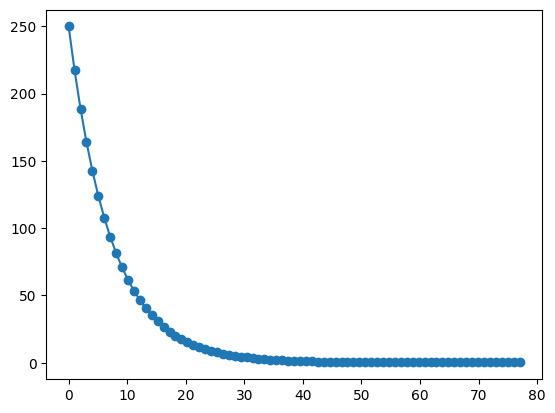

In [46]:
def plot_loss_epocs(loss_list):
    xaxis=np.linspace(0,len(loss_list),len(loss_list))
    plt.plot(xaxis,loss_list,marker="o")
    plt.show()
plot_loss_epocs(loss_list)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

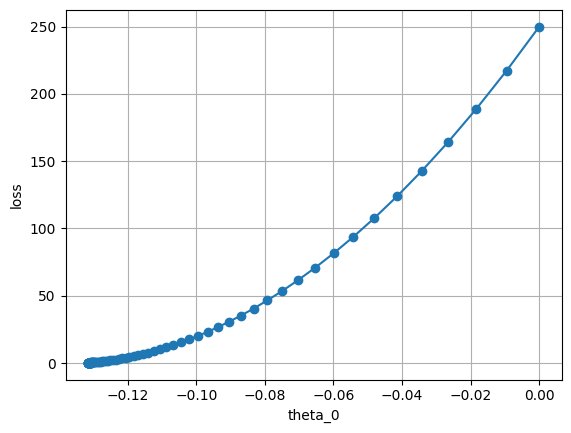

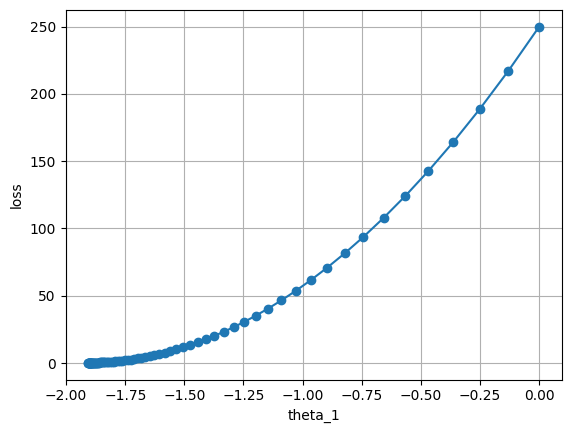

In [47]:
def plot_theta_loss(loss_list,theta_0_list,theta_1_list):
    plt.plot(theta_0_list,loss_list,marker="o")
    plt.grid(True)
    plt.xlabel("theta_0")
    plt.ylabel("loss")
    plt.show()
    plt.clf()
    plt.plot(theta_1_list,loss_list,marker="o")
    plt.grid(True)
    plt.xlabel("theta_1")
    plt.ylabel("loss")
    plt.show()
plot_theta_loss(loss_list,theta_0_list,theta_1_list)

#### Plot all regression lines till converge

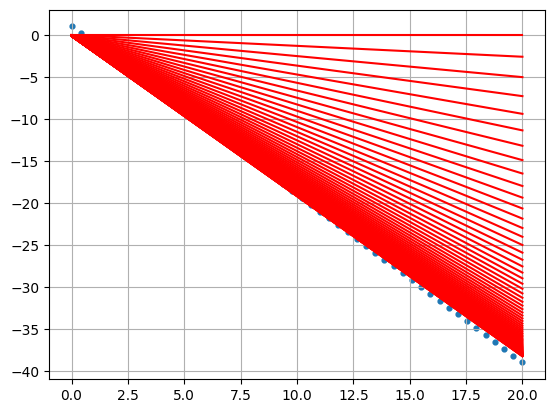

In [48]:
def plot_regression_lines(theta_0_list,theta_1_list,x,y):
    plt.scatter(x,y,s=12)
    for i in range(len(theta_0_list)):
        x0=np.ones(x.shape)
        y_hat=theta_0_list[i]*x0+theta_1_list[i]*X
        plt.plot(X,y_hat,'red')
    plt.grid(True)
    plt.show()
plot_regression_lines(theta_0_list,theta_1_list,X,y)

#### Plot the best regression line

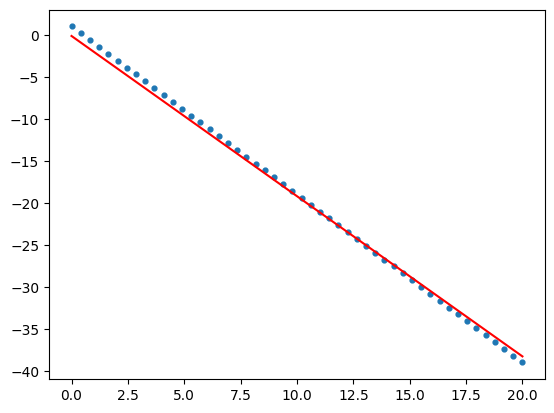

In [49]:
def plot_best_regression_line(theta_0,theta_1,x,y):
    plt.scatter(x,y,s=12)
    x0=np.ones(x.shape)
    y_hat=theta_0*x0+theta_1*X
    plt.plot(X,y_hat,'red')
    plt.show()
plot_best_regression_line(theta_0,theta_1,X,y)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [50]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1 =GD(X,y,0.00005,1000)


************************* iter 0 *************************
y_predict
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error vector
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j = 249.88775510204087
[[ 19.       ]
 [259.3877551]]
-0.00095
-0.012969387755102042
Gradiant_vec_norm = 260.08269357432516
************************* ite

In [51]:
r2_s(theta_0,theta_1,X,y)

-0.13128681387727292
-1.8834149438699859
[ -0.13128681  -0.90002761  -1.6687684   -2.43750919  -3.20624999
  -3.97499078  -4.74373157  -5.51247237  -6.28121316  -7.04995395
  -7.81869475  -8.58743554  -9.35617633 -10.12491713 -10.89365792
 -11.66239872 -12.43113951 -13.1998803  -13.9686211  -14.73736189
 -15.50610268 -16.27484348 -17.04358427 -17.81232506 -18.58106586
 -19.34980665 -20.11854744 -20.88728824 -21.65602903 -22.42476982
 -23.19351062 -23.96225141 -24.7309922  -25.499733   -26.26847379
 -27.03721458 -27.80595538 -28.57469617 -29.34343696 -30.11217776
 -30.88091855 -31.64965934 -32.41840014 -33.18714093 -33.95588172
 -34.72462252 -35.49336331 -36.2621041  -37.0308449  -37.79958569]
0.9965933726454433


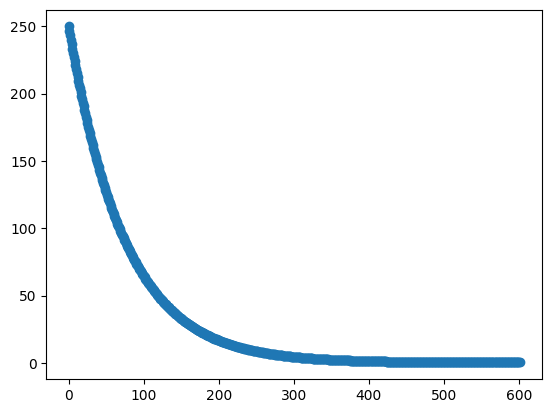

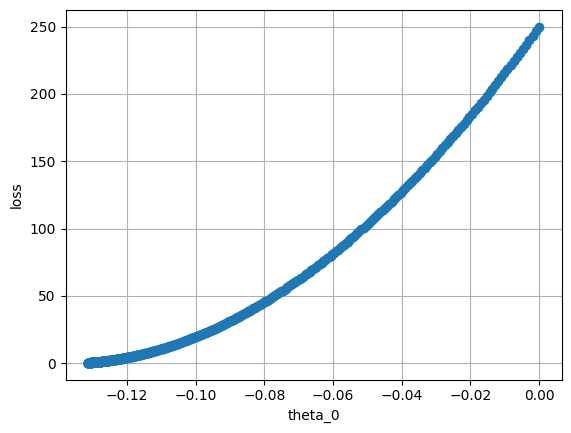

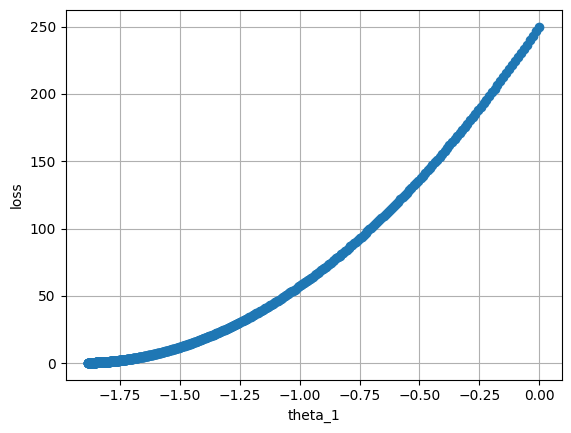

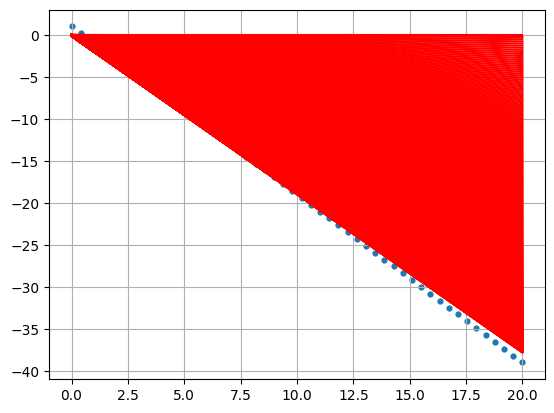

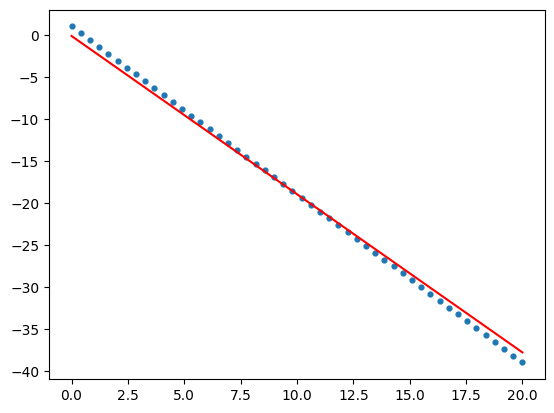

In [52]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,X,y)
plot_best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [53]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1 =GD(X,y,0.005,300)

************************* iter 0 *************************
y_predict
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
error vector
 [-1.         -0.18367347  0.63265306  1.44897959  2.26530612  3.08163265
  3.89795918  4.71428571  5.53061224  6.34693878  7.16326531  7.97959184
  8.79591837  9.6122449  10.42857143 11.24489796 12.06122449 12.87755102
 13.69387755 14.51020408 15.32653061 16.14285714 16.95918367 17.7755102
 18.59183673 19.40816327 20.2244898  21.04081633 21.85714286 22.67346939
 23.48979592 24.30612245 25.12244898 25.93877551 26.75510204 27.57142857
 28.3877551  29.20408163 30.02040816 30.83673469 31.65306122 32.46938776
 33.28571429 34.10204082 34.91836735 35.73469388 36.55102041 37.36734694
 38.18367347 39.        ]
j = 249.88775510204087
[[ 19.       ]
 [259.3877551]]
-0.095
-1.2969387755102042
Gradiant_vec_norm = 260.08269357432516
************************* iter 1 

In [54]:
r2_s(theta_0,theta_1,X,y)

-0.13077618808187058
-1.9156614004748331
[ -0.13077619  -0.9126788   -1.69458141  -2.47648403  -3.25838664
  -4.04028925  -4.82219186  -5.60409448  -6.38599709  -7.1678997
  -7.94980231  -8.73170492  -9.51360754 -10.29551015 -11.07741276
 -11.85931537 -12.64121799 -13.4231206  -14.20502321 -14.98692582
 -15.76882844 -16.55073105 -17.33263366 -18.11453627 -18.89643889
 -19.6783415  -20.46024411 -21.24214672 -22.02404934 -22.80595195
 -23.58785456 -24.36975717 -25.15165979 -25.9335624  -26.71546501
 -27.49736762 -28.27927024 -29.06117285 -29.84307546 -30.62497807
 -31.40688069 -32.1887833  -32.97068591 -33.75258852 -34.53449114
 -35.31639375 -36.09829636 -36.88019897 -37.66210159 -38.4440042 ]
0.9976265938305019


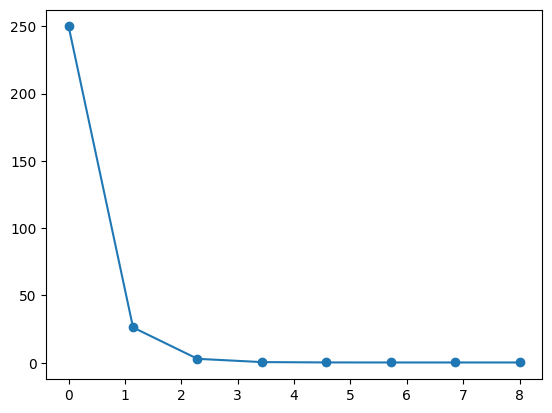

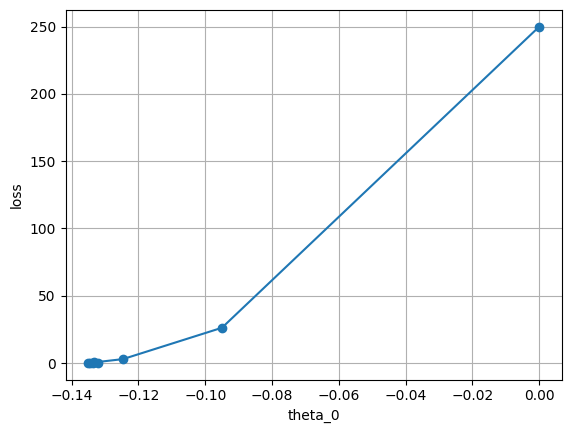

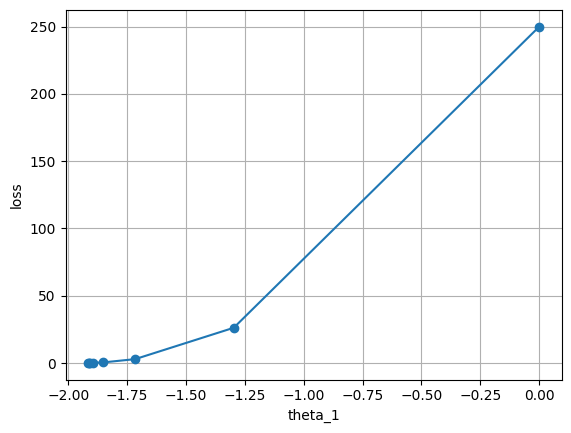

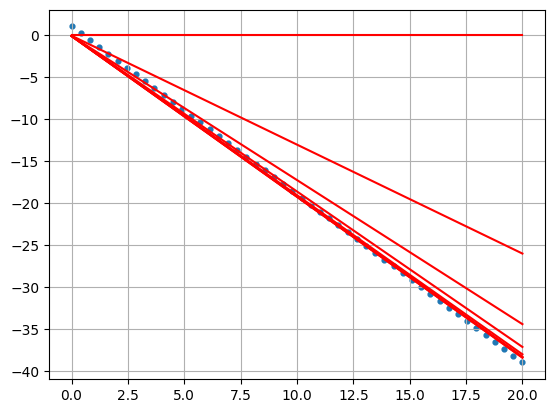

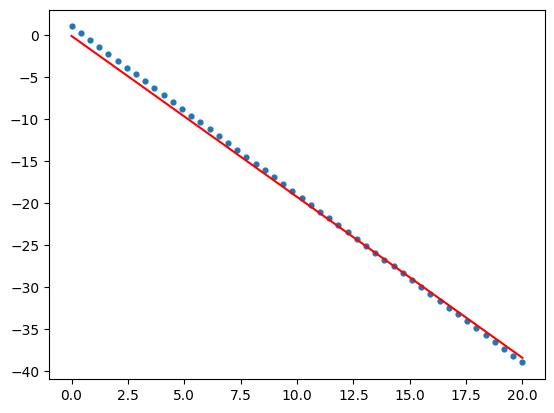

In [55]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,X,y)
plot_best_regression_line(theta_0,theta_1,X,y)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


In [56]:
def GD(data,target,learning_rate,max_iterations,batch_size=1):
    data=data.reshape(-1,1)
    target=target.reshape(-1,1)
    x_0 = np.ones(data.shape)
    arr= np.concatenate([x_0,data,target],axis=1)
    np.random.shuffle(arr)
    x_0=arr[:,0]
    x_1=arr[:,1]
    target=arr[:,2]
    theta_0 = 0
    theta_1 = 0
    theta_0_list=[]
    theta_1_list=[]
    loss=[]
    itterations_per_batch = len(X)//batch_size
    print(itterations_per_batch)
    if len(data)%batch_size != 0:
        itterations_per_batch+=1
    for i in range(max_iterations):
        print("************************* iter",i,"*************************")
        for i in range(itterations_per_batch):
            x_0_batch=x_0[i*batch_size:(i+1)*batch_size]
            x_1_batch=x_1[i*batch_size:(i+1)*batch_size]
            y_batch=target[i*batch_size:(i+1)*batch_size]
            if i == itterations_per_batch-1:
                x_0_batch=x_0[i*batch_size:]
                x_1_batch=x_1[i*batch_size:]
                y_batch=target[i*batch_size:]
            theta_0_list.append(theta_0)
            theta_1_list.append(theta_1)
            y_hat = theta_0*x_0_batch+theta_1*x_1_batch
            e = (y_hat-y_batch)
            j = (np.linalg.norm(e)**2)/(2*batch_size)
            loss.append(j)
            Gradiant_vec = np.array([[np.sum(e)/batch_size],[np.sum(e*x_1_batch)/batch_size]])
            theta_0 = theta_0 - (learning_rate*Gradiant_vec[0,0])
            theta_1 = theta_1 - (learning_rate*Gradiant_vec[1,0])
            Gradiant_vec_norm = np.linalg.norm(Gradiant_vec)
            if Gradiant_vec_norm < 0.001:
                return theta_0_list,theta_1_list,loss,theta_0,theta_1
            if i>=3:
                if abs(loss[-1]-loss[-2])<0.001:
                    return theta_0_list,theta_1_list,loss,theta_0,theta_1
        print('j =',j)
        print(Gradiant_vec)
        print("Gradiant_vec_norm =",Gradiant_vec_norm)
        print("theta_new :")
        print(theta_0)
        print(theta_1)
    return theta_0_list,theta_1_list,loss,theta_0,theta_1

In [57]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1=GD(X,y,0.0005,300)

50
************************* iter 0 *************************
j = 0.4642688498100117
[[ 0.96360661]
 [14.94573518]]
Gradiant_vec_norm = 14.976766601132132
theta_new :
-0.14659491883873627
-1.8714514642079045
************************* iter 1 *************************
j = 0.0025749423687420553
[[0.0717627 ]
 [1.11305408]]
Gradiant_vec_norm = 1.1153650856616426
theta_new :
-0.14335860232515402
-1.922215493488095
************************* iter 2 *************************
j = 0.0011283865323355527
[[0.04750551]
 [0.73682009]]
Gradiant_vec_norm = 0.7383499265446222
theta_new :
-0.1361423999485119
-1.9240558001907182
************************* iter 3 *************************
j = 0.0010839946017731693
[[0.04656167]
 [0.72218102]]
Gradiant_vec_norm = 0.7236804637385674
theta_new :
-0.128864945048097
-1.9245785070569834
************************* iter 4 *************************
j = 0.001069351905485816
[[0.04624612]
 [0.71728679]]
Gradiant_vec_norm = 0.7187760748955812
theta_new :
-0.12163123592

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [58]:
r2_s(theta_0,theta_1,X,y)

0.5290817565722692
-1.9671556954119698
[  0.52908176  -0.27383894  -1.07675963  -1.87968032  -2.68260101
  -3.4855217   -4.2884424   -5.09136309  -5.89428378  -6.69720447
  -7.50012516  -8.30304586  -9.10596655  -9.90888724 -10.71180793
 -11.51472862 -12.31764932 -13.12057001 -13.9234907  -14.72641139
 -15.52933208 -16.33225278 -17.13517347 -17.93809416 -18.74101485
 -19.54393554 -20.34685624 -21.14977693 -21.95269762 -22.75561831
 -23.558539   -24.3614597  -25.16438039 -25.96730108 -26.77022177
 -27.57314246 -28.37606316 -29.17898385 -29.98190454 -30.78482523
 -31.58774592 -32.39066662 -33.19358731 -33.996508   -34.79942869
 -35.60234938 -36.40527008 -37.20819077 -38.01111146 -38.81403215]
0.9995840393972832


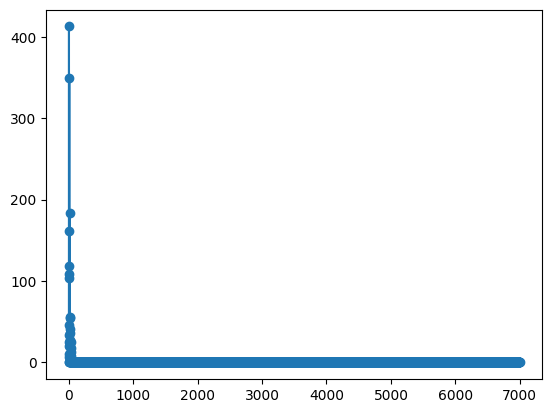

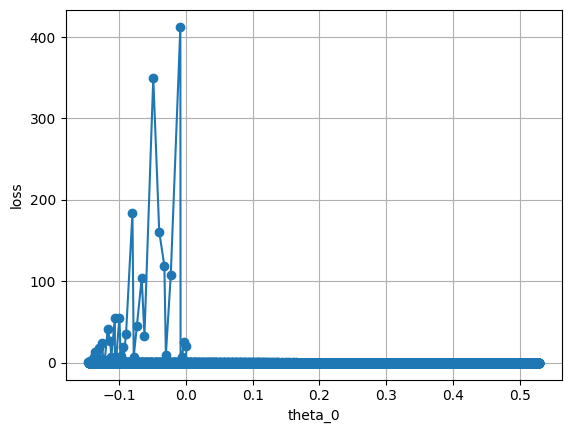

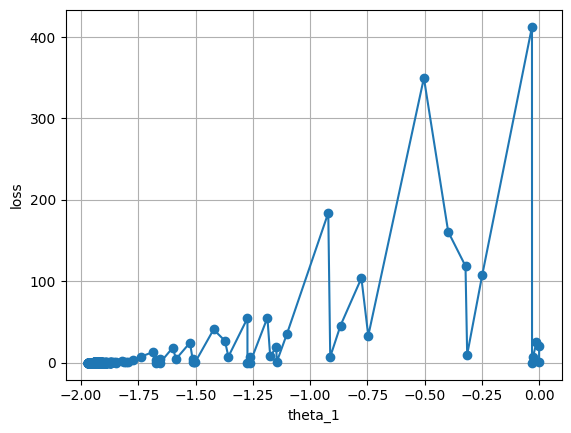

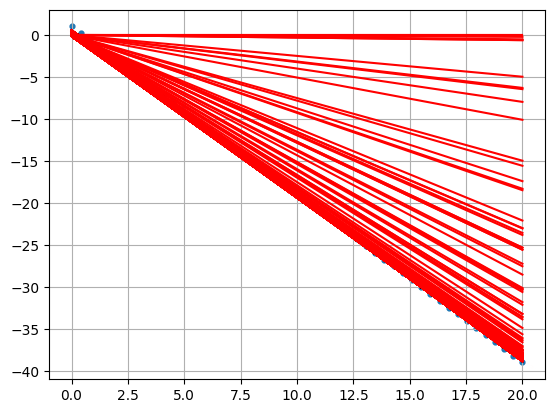

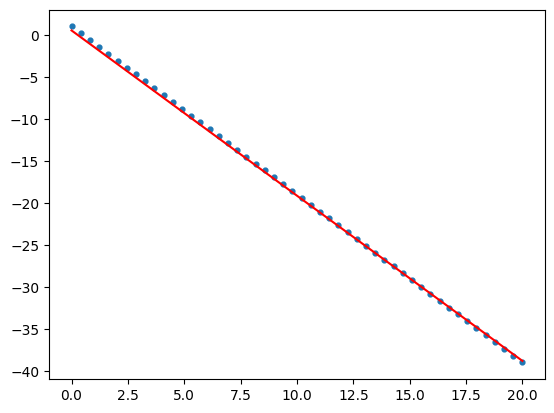

In [59]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,X,y)
plot_best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [60]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1=GD(X,y,0.0001,300)

50
************************* iter 0 *************************
j = 151.91293888825282
[[ 17.43060176]
 [298.81031592]]
Gradiant_vec_norm = 299.3182767145398
theta_new :
-0.06961948530719038
-0.950803137357197
************************* iter 1 *************************
j = 39.906713485559564
[[  8.93383607]
 [153.15147553]]
Gradiant_vec_norm = 153.41182445883956
theta_new :
-0.10396462086638587
-1.4298288878143193
************************* iter 2 *************************
j = 10.826822083336856
[[ 4.65334763]
 [79.77167366]]
Gradiant_vec_norm = 79.90728103581107
theta_new :
-0.12054104206736922
-1.6711941393499232
************************* iter 3 *************************
j = 3.1170852316514135
[[ 2.49683209]
 [42.80283575]]
Gradiant_vec_norm = 42.87559817498178
theta_new :
-0.12816730696497505
-1.792836550533818
************************* iter 4 *************************
j = 0.9944444409576579
[[ 1.41027972]
 [24.17622373]]
Gradiant_vec_norm = 24.21732195662654
theta_new :
-0.131285811055

In [61]:
r2_s(theta_0,theta_1,X,y)

-0.12931761747203951
-1.912001410190002
[ -0.12931762  -0.90972636  -1.6901351   -2.47054383  -3.25095257
  -4.03136131  -4.81177005  -5.59217879  -6.37258753  -7.15299627
  -7.93340501  -8.71381374  -9.49422248 -10.27463122 -11.05503996
 -11.8354487  -12.61585744 -13.39626618 -14.17667492 -14.95708366
 -15.73749239 -16.51790113 -17.29830987 -18.07871861 -18.85912735
 -19.63953609 -20.41994483 -21.20035357 -21.98076231 -22.76117104
 -23.54157978 -24.32198852 -25.10239726 -25.882806   -26.66321474
 -27.44362348 -28.22403222 -29.00444096 -29.78484969 -30.56525843
 -31.34566717 -32.12607591 -32.90648465 -33.68689339 -34.46730213
 -35.24771087 -36.0281196  -36.80852834 -37.58893708 -38.36934582]
0.9976160989584562


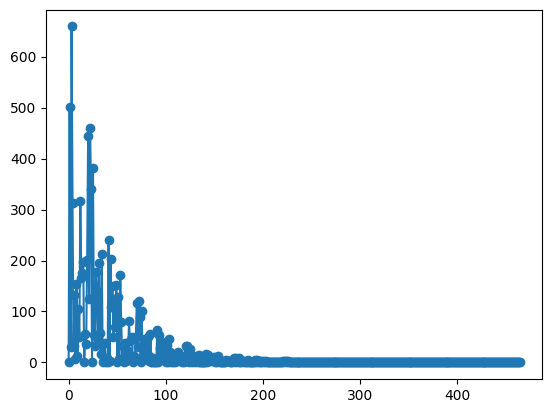

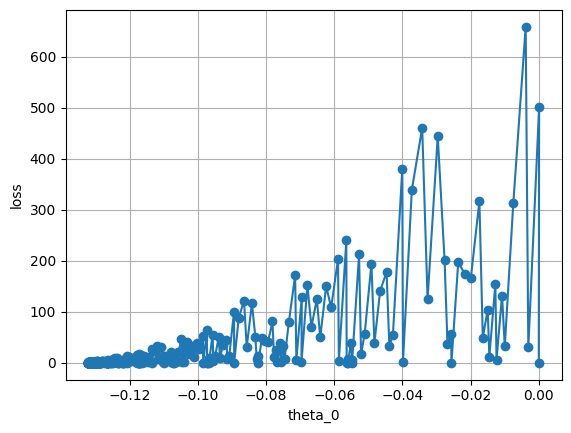

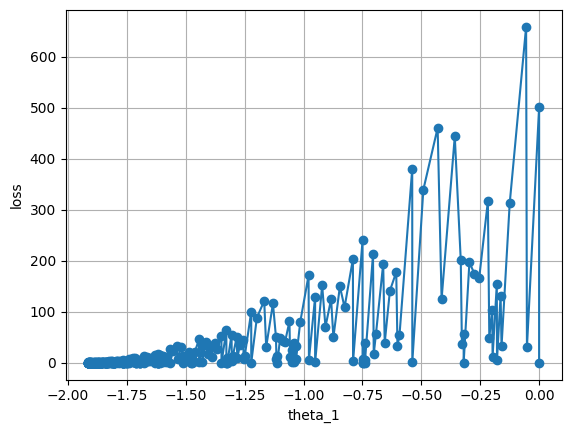

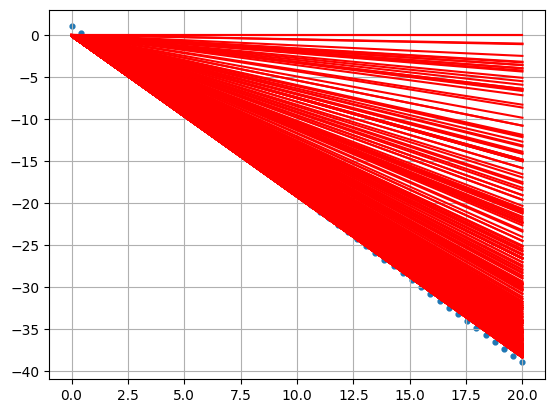

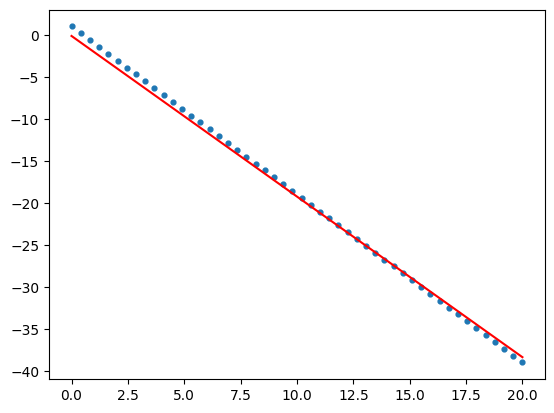

In [62]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,X,y)
plot_best_regression_line(theta_0,theta_1,X,y)

##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [63]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1=GD(X,y,0.00007,300)

50
************************* iter 0 *************************
j = 59.989015451313186
[[ 10.95344836]
 [102.8282907 ]]
Gradiant_vec_norm = 103.41003528791484
theta_new :
-0.053632544708340044
-0.7282645154779267
************************* iter 1 *************************
j = 22.146073701284806
[[ 6.65523459]
 [62.47771245]]
Gradiant_vec_norm = 62.831176177374545
theta_new :
-0.08649119972969808
-1.1797609701426492
************************* iter 2 *************************
j = 7.963221780761281
[[ 3.99079485]
 [37.46460475]]
Gradiant_vec_norm = 37.67655839265906
theta_new :
-0.10647199515783434
-1.4596825502658473
************************* iter 3 *************************
j = 2.7358555498191177
[[ 2.33916889]
 [21.95954469]]
Gradiant_vec_norm = 22.08377943310082
theta_new :
-0.11846986026637815
-1.633240917144643
************************* iter 4 *************************
j = 0.8651507245624287
[[ 1.31540923]
 [12.34873973]]
Gradiant_vec_norm = 12.418601953314727
theta_new :
-0.12551927331

In [64]:
r2_s(theta_0,theta_1,X,y)

-0.12588589480062667
-1.916238403462787
[ -0.12588589  -0.90802402  -1.69016214  -2.47230027  -3.25443839
  -4.03657651  -4.81871464  -5.60085276  -6.38299089  -7.16512901
  -7.94726713  -8.72940526  -9.51154338 -10.29368151 -11.07581963
 -11.85795775 -12.64009588 -13.422234   -14.20437212 -14.98651025
 -15.76864837 -16.5507865  -17.33292462 -18.11506274 -18.89720087
 -19.67933899 -20.46147712 -21.24361524 -22.02575336 -22.80789149
 -23.59002961 -24.37216773 -25.15430586 -25.93644398 -26.71858211
 -27.50072023 -28.28285835 -29.06499648 -29.8471346  -30.62927273
 -31.41141085 -32.19354897 -32.9756871  -33.75782522 -34.53996334
 -35.32210147 -36.10423959 -36.88637772 -37.66851584 -38.45065396]
0.9976471931395574


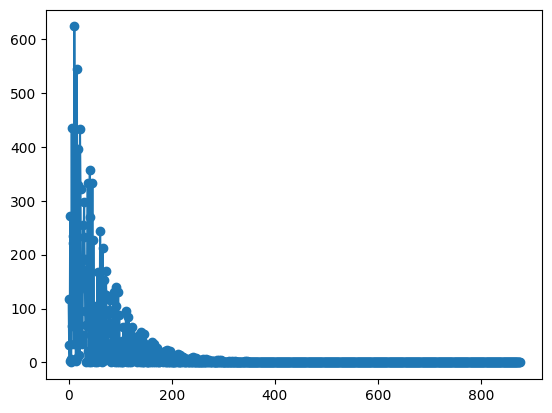

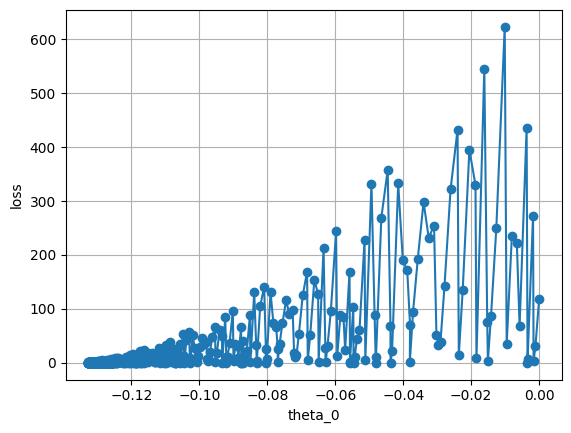

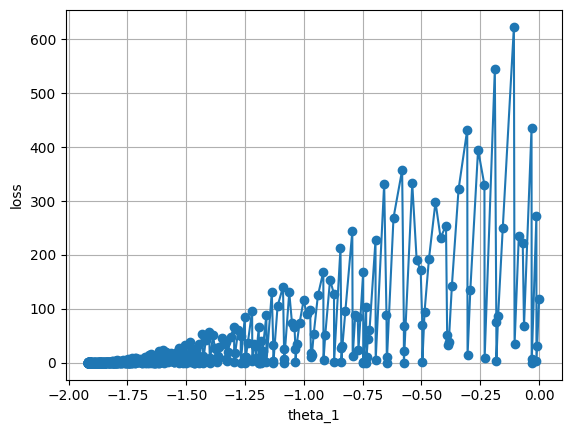

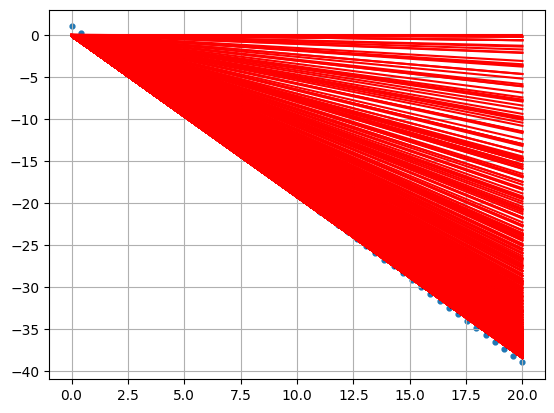

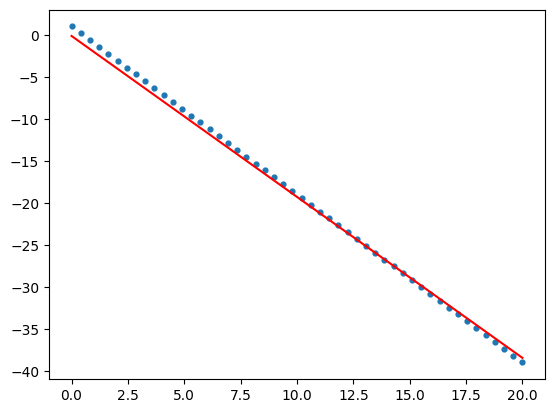

In [65]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,X,y)
plot_best_regression_line(theta_0,theta_1,X,y)

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [66]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1=GD(X,y,0.0005,300,5)

10
************************* iter 0 *************************
j = 35.964368193073724
[[ 6.92545408]
 [74.53369956]]
Gradiant_vec_norm = 74.85475458881972
theta_new :
-0.06995953886445606
-0.9731212142704766
************************* iter 1 *************************
j = 8.351443693951285
[[ 3.14959577]
 [35.6356555 ]]
Gradiant_vec_norm = 35.77457052854631
theta_new :
-0.10361792586410541
-1.4517028656508082
************************* iter 2 *************************
j = 1.9276176007601706
[[ 1.29317197]
 [16.50910955]]
Gradiant_vec_norm = 16.559679707802168
theta_new :
-0.11942642132961974
-1.6870979287489611
************************* iter 3 *************************
j = 0.4984594403323695
[[0.3806168 ]
 [7.10506365]]
Gradiant_vec_norm = 7.1152511286460705
theta_new :
-0.126458307669139
-1.8029075447811256
************************* iter 4 *************************
j = 0.21366781282222647
[[-0.06779771]
 [ 2.48199032]]
Gradiant_vec_norm = 2.4829161233357175
theta_new :
-0.1291753094842197

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [67]:
r2_s(theta_0,theta_1,X,y)

0.22480206202970793
-1.9418253395804894
[  0.22480206  -0.56777971  -1.36036148  -2.15294325  -2.94552502
  -3.73810679  -4.53068857  -5.32327034  -6.11585211  -6.90843388
  -7.70101565  -8.49359742  -9.28617919 -10.07876096 -10.87134274
 -11.66392451 -12.45650628 -13.24908805 -14.04166982 -14.83425159
 -15.62683336 -16.41941513 -17.21199691 -18.00457868 -18.79716045
 -19.58974222 -20.38232399 -21.17490576 -21.96748753 -22.7600693
 -23.55265108 -24.34523285 -25.13781462 -25.93039639 -26.72297816
 -27.51555993 -28.3081417  -29.10072347 -29.89330525 -30.68588702
 -31.47846879 -32.27105056 -33.06363233 -33.8562141  -34.64879587
 -35.44137764 -36.23395942 -37.02654119 -37.81912296 -38.61170473]
0.9988842584700288


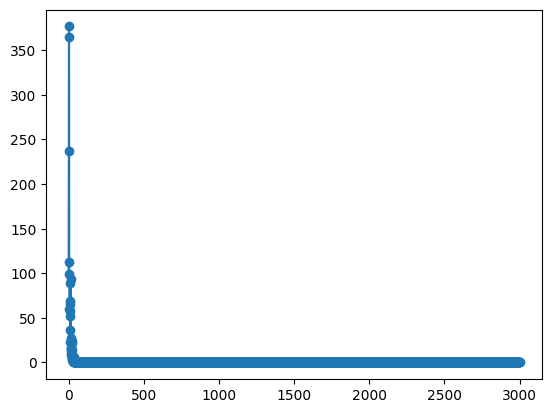

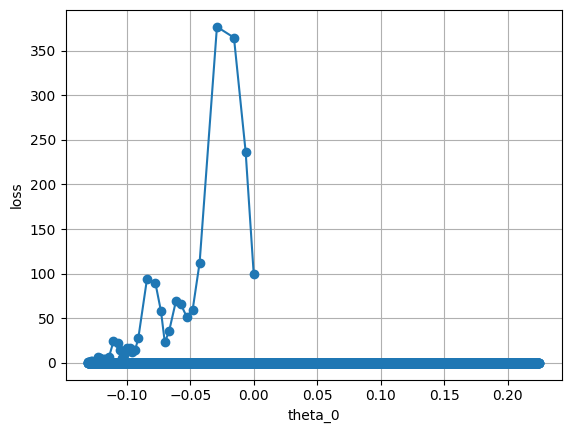

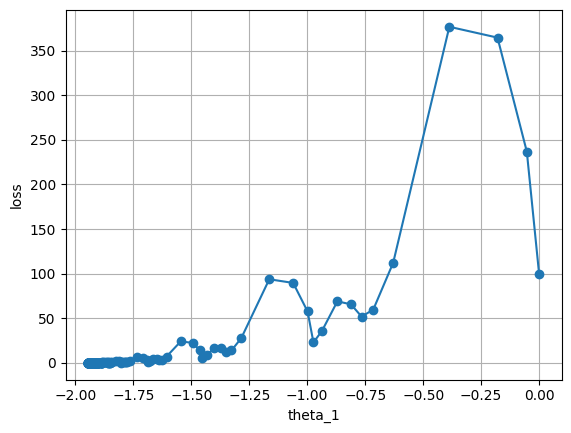

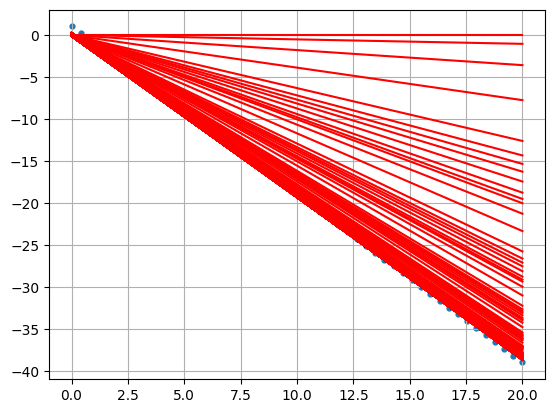

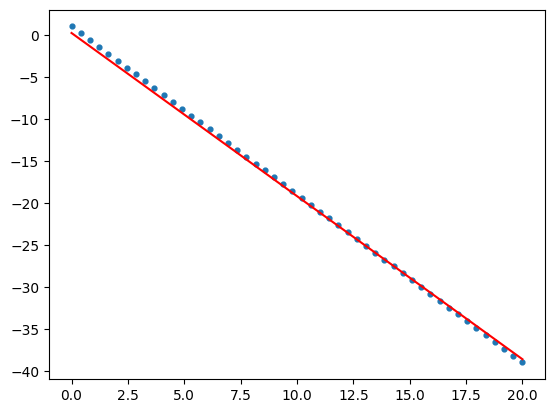

In [68]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,X,y)
plot_best_regression_line(theta_0,theta_1,X,y)

##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [69]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1=GD(X,y,0.0005,300,10)

5
************************* iter 0 *************************
j = 228.9213515362614
[[ 19.77142839]
 [302.13969423]]
Gradiant_vec_norm = 302.7859049035021
theta_new :
-0.041604439888778155
-0.5682216973724068
************************* iter 1 *************************
j = 113.94444058847789
[[ 13.90148315]
 [213.1249916 ]]
Gradiant_vec_norm = 213.57788574418214
theta_new :
-0.07065092754431047
-0.967907242075217
************************* iter 2 *************************
j = 56.87157833766573
[[  9.77274925]
 [150.51442362]]
Gradiant_vec_norm = 150.83135730174163
theta_new :
-0.09086468053034646
-1.2490496806274318
************************* iter 3 *************************
j = 28.502061968004057
[[  6.86872932]
 [106.47570421]]
Gradiant_vec_norm = 106.69702446567042
theta_new :
-0.10486590110481171
-1.4468125694132095
************************* iter 4 *************************
j = 14.372675369591278
[[ 4.82613517]
 [75.49984659]]
Gradiant_vec_norm = 75.65393853191843
theta_new :
-0.1144975

In [70]:
r2_s(theta_0,theta_1,X,y)

-0.12749540603294954
-1.7872877360580735
[ -0.12749541  -0.8570006   -1.5865058   -2.316011    -3.0455162
  -3.7750214   -4.5045266   -5.23403179  -5.96353699  -6.69304219
  -7.42254739  -8.15205259  -8.88155779  -9.61106299 -10.34056818
 -11.07007338 -11.79957858 -12.52908378 -13.25858898 -13.98809418
 -14.71759937 -15.44710457 -16.17660977 -16.90611497 -17.63562017
 -18.36512537 -19.09463056 -19.82413576 -20.55364096 -21.28314616
 -22.01265136 -22.74215656 -23.47166175 -24.20116695 -24.93067215
 -25.66017735 -26.38968255 -27.11918775 -27.84869294 -28.57819814
 -29.30770334 -30.03720854 -30.76671374 -31.49621894 -32.22572414
 -32.95522933 -33.68473453 -34.41423973 -35.14374493 -35.87325013]
0.9814878620626675


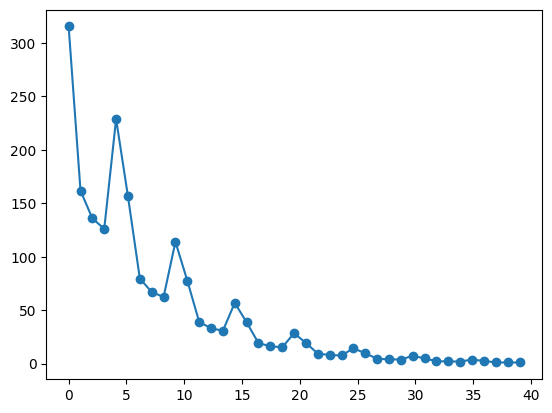

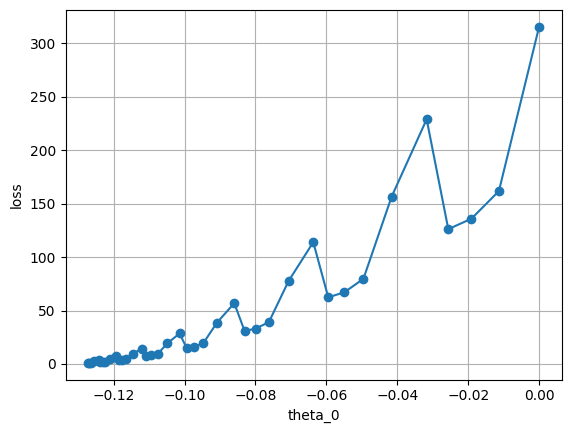

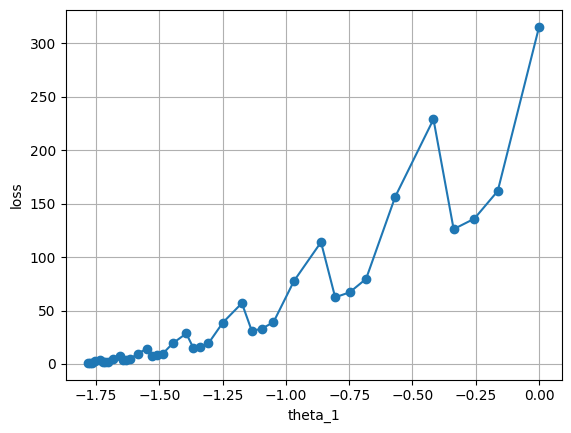

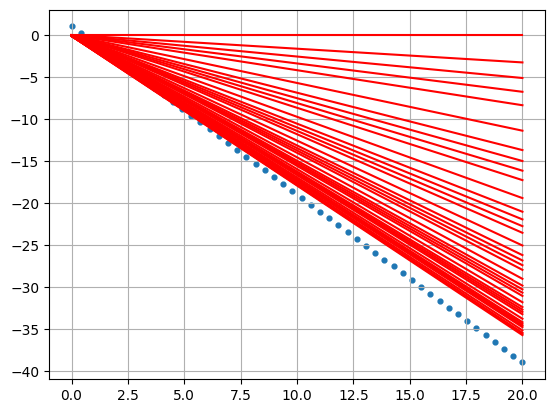

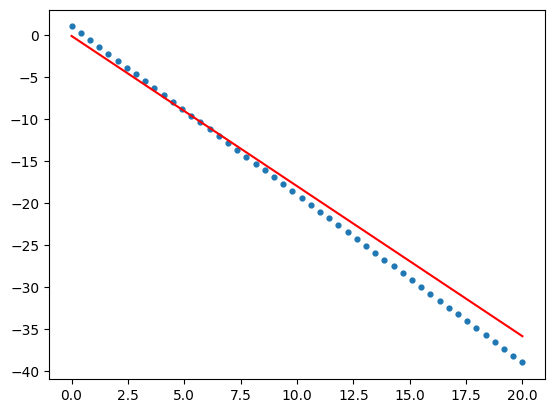

In [71]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,X,y)
plot_best_regression_line(theta_0,theta_1,X,y)

##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [72]:
theta_0_list,theta_1_list,loss_list,theta_0,theta_1=GD(X,y,0.0005,300,20)

2
************************* iter 0 *************************
j = 108.7632751959137
[[  8.960826  ]
 [128.94931206]]
Gradiant_vec_norm = 129.260285794092
theta_new :
-0.022479580773959236
-0.30681763418385577
************************* iter 1 *************************
j = 76.8078778862193
[[  7.50729001]
 [108.34828395]]
Gradiant_vec_norm = 108.60805696436633
theta_new :
-0.041299499740078384
-0.564488218783921
************************* iter 2 *************************
j = 54.25834005066321
[[ 6.28661252]
 [91.04746958]]
Gradiant_vec_norm = 91.26424937821146
theta_new :
-0.057046044046803905
-0.7808849835003946
************************* iter 3 *************************
j = 38.34444582286242
[[ 5.2614902 ]
 [76.51818321]]
Gradiant_vec_norm = 76.69886336204213
theta_new :
-0.07021157914148601
-0.9626198868610633
************************* iter 4 *************************
j = 27.112130519352394
[[ 4.40059561]
 [64.31643317]]
Gradiant_vec_norm = 64.46680399615143
theta_new :
-0.08120959478562

In [73]:
r2_s(theta_0,theta_1,X,y)

-0.03794417096237024
-1.9228561676106504
[-3.79441710e-02 -8.22783423e-01 -1.60762268e+00 -2.39246193e+00
 -3.17730118e+00 -3.96214043e+00 -4.74697968e+00 -5.53181894e+00
 -6.31665819e+00 -7.10149744e+00 -7.88633669e+00 -8.67117594e+00
 -9.45601520e+00 -1.02408544e+01 -1.10256937e+01 -1.18105330e+01
 -1.25953722e+01 -1.33802115e+01 -1.41650507e+01 -1.49498900e+01
 -1.57347292e+01 -1.65195685e+01 -1.73044077e+01 -1.80892470e+01
 -1.88740862e+01 -1.96589255e+01 -2.04437647e+01 -2.12286040e+01
 -2.20134432e+01 -2.27982825e+01 -2.35831217e+01 -2.43679610e+01
 -2.51528002e+01 -2.59376395e+01 -2.67224787e+01 -2.75073180e+01
 -2.82921572e+01 -2.90769965e+01 -2.98618358e+01 -3.06466750e+01
 -3.14315143e+01 -3.22163535e+01 -3.30011928e+01 -3.37860320e+01
 -3.45708713e+01 -3.53557105e+01 -3.61405498e+01 -3.69253890e+01
 -3.77102283e+01 -3.84950675e+01]
0.9980004068458397


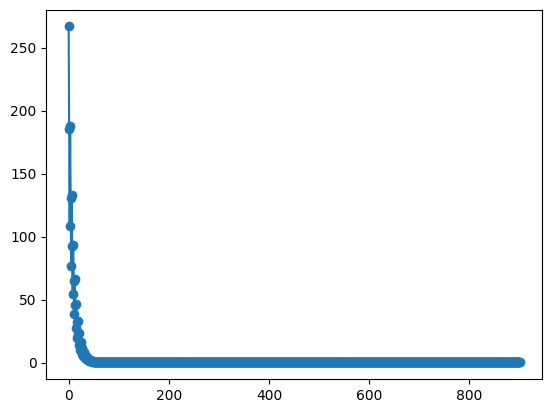

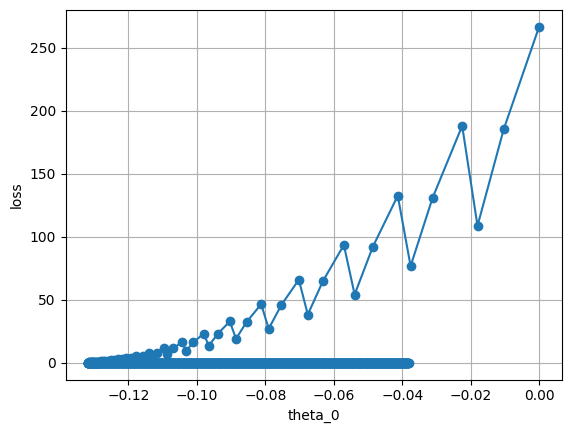

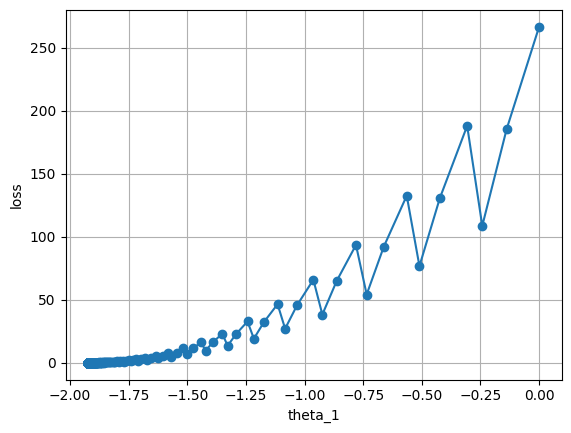

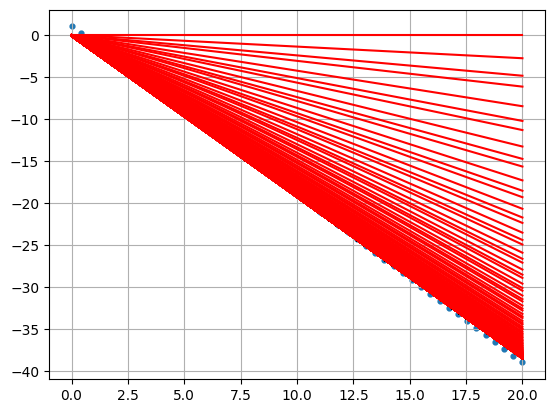

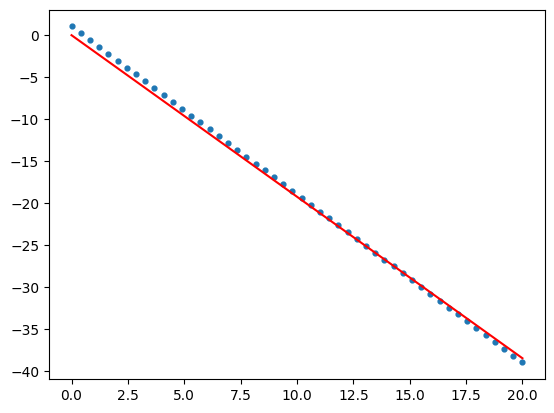

In [74]:
plot_loss_epocs(loss_list)
plot_theta_loss(loss_list,theta_0_list,theta_1_list)
plot_regression_lines(theta_0_list,theta_1_list,X,y)
plot_best_regression_line(theta_0,theta_1,X,y)